In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
from kan import *
from kan.utils import ex_round
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [2]:
# Step 1: Load the Data
xtrain_path = 'xtrain.csv'
xtest_path = 'xtest.csv'
ytrain_path = 'ytrain.csv'
ytest_path = 'ytest.csv'
xtrain = pd.read_csv(xtrain_path)
xtest = pd.read_csv(xtest_path)
ytrain = pd.read_csv(ytrain_path)
ytest = pd.read_csv(ytest_path)

X_train = xtrain.to_numpy()
X_test = xtest.to_numpy()
Y_train = ytrain.to_numpy()
Y_test = ytest.to_numpy()

# Step 5: Convert to Torch Tensors and Create Dataset Format
train_input = torch.tensor(X_train, dtype=torch.double)
train_label = torch.tensor(Y_train, dtype=torch.double)

test_input = torch.tensor(X_test, dtype=torch.double)
test_label = torch.tensor(Y_test, dtype=torch.double)

# Creating the dataset dictionary
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

# Checking the shape of the tensors
print(dataset['train_input'].shape, dataset['train_label'].shape)
print(dataset['test_input'].shape, dataset['test_label'].shape)

torch.Size([2100, 8]) torch.Size([2100, 4])
torch.Size([904, 8]) torch.Size([904, 4])


In [3]:
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[8,4], grid=3, k=3, seed=42, device=device)

checkpoint directory created: ./model
saving model version 0.0


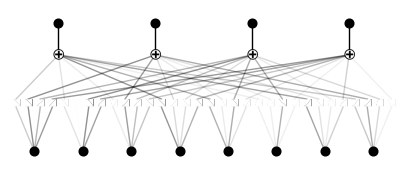

In [4]:
# plot KAN at initialization
model(dataset['train_input'])
model.plot()

In [5]:
# train the model
model.fit(dataset, opt="LBFGS", steps=100, lamb=0.001, lamb_entropy=2)

| train_loss: 4.23e-03 | test_loss: 4.37e-03 | reg: 2.26e-02 | : 100%|█| 100/100 [00:35<00:00,  2.82

saving model version 0.1


{'train_loss': [array(0.00590671),
  array(0.00550986),
  array(0.00523471),
  array(0.00457698),
  array(0.00432181),
  array(0.00428085),
  array(0.00426466),
  array(0.00424099),
  array(0.00424467),
  array(0.00421864),
  array(0.00421424),
  array(0.00421628),
  array(0.00421645),
  array(0.00421563),
  array(0.00421505),
  array(0.00421737),
  array(0.0042181),
  array(0.00422204),
  array(0.00421516),
  array(0.00421369),
  array(0.00421244),
  array(0.00421205),
  array(0.00421114),
  array(0.00421044),
  array(0.0042097),
  array(0.00420888),
  array(0.004209),
  array(0.00420892),
  array(0.00420896),
  array(0.00420891),
  array(0.0042095),
  array(0.0042204),
  array(0.00424402),
  array(0.00425991),
  array(0.00427146),
  array(0.00427661),
  array(0.00426601),
  array(0.00425646),
  array(0.00422635),
  array(0.00421303),
  array(0.00421266),
  array(0.00420963),
  array(0.00420639),
  array(0.004205),
  array(0.00420277),
  array(0.00420101),
  array(0.00419802),
  array

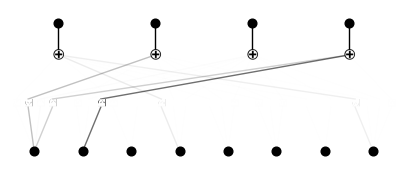

In [6]:
model.plot()

In [7]:
model = model.refine(5)
model.fit(dataset, opt="LBFGS", steps=400)

saving model version 0.2


| train_loss: 7.95e-04 | test_loss: 8.24e-04 | reg: 7.07e-01 | : 100%|█| 400/400 [01:51<00:00,  3.57

saving model version 0.3


{'train_loss': [array(0.00082853),
  array(0.00082219),
  array(0.00080337),
  array(0.00079605),
  array(0.00079595),
  array(0.00079552),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),
  array(0.00079541),

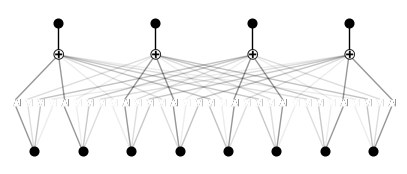

In [8]:
model.plot()

In [9]:
X_test = dataset['test_input']  # Shape: (n_samples, 6)
Y_test = dataset['test_label']  # Shape: (n_samples,)

Y_pred = model(X_test)

In [ ]:
y_pred_KAN = Y_pred.detach().numpy()

KAN_mae = mean_absolute_error(ytest, y_pred_KAN)
KAN_mape = np.mean(np.abs((ytest - y_pred_KAN) / ytest)) * 100  # Mean Absolute Percentage Error
KAN_mse = mean_squared_error(ytest, y_pred_KAN)
KAN_rmse = np.sqrt(KAN_mse)  # Root Mean Squared Error
KAN_rmspe = np.sqrt(np.mean(np.square((ytest - y_pred_KAN) / ytest))) * 100  # Root Mean Square Percentage Error
KAN_r2 = r2_score(ytest, y_pred_KAN)

# Printing the metrics
print(f"KAN Mean Absolute Error (MAE): {KAN_mae:.4f}")
print(f"KAN Mean Absolute Percentage Error (MAPE): {KAN_mape:.4f}%")
print(f"KAN Mean Squared Error (MSE): {KAN_mse:.4f}")
print(f"KAN Root Mean Squared Error (RMSE): {KAN_rmse:.4f}")
print(f"KAN Root Mean Square Percentage Error (RMSPE): {KAN_rmspe:.4f}%")
print(f"KAN R-squared (R2): {KAN_r2:.4f}")

KAN Mean Absolute Error (MAE): 0.0007
KAN Mean Absolute Percentage Error (MAPE): 0.2607%
KAN Mean Squared Error (MSE): 0.0000
KAN Root Mean Squared Error (RMSE): 0.0008
KAN Root Mean Square Percentage Error (RMSPE): 0.3284%
KAN R-squared (R2): 0.9634


In [11]:
SYMBOLIC_LIB.keys()

dict_keys(['x', 'x^2', 'x^3', 'x^4', 'x^5', '1/x', '1/x^2', '1/x^3', '1/x^4', '1/x^5', 'sqrt', 'x^0.5', 'x^1.5', '1/sqrt(x)', '1/x^0.5', 'exp', 'log', 'abs', 'sin', 'cos', 'tan', 'tanh', 'sgn', 'arcsin', 'arccos', 'arctan', 'arctanh', '0', 'gaussian'])

In [12]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin')
    model.fix_symbolic(0,1,0,'x^2')
    model.fix_symbolic(1,0,0,'exp')
elif mode == "auto":
    # automatic mode
    lib = ['x', 'x^0.5','x^2','x^3','x^4','1/x','1/x^0.5','1/x^2','1/x^3','1/x^4','exp','log','sqrt','tanh','sin','tan','abs', 'gaussian', 'sgn', '0']
    model.auto_symbolic(lib=None, weight_simple=0) # Lib none uses all of symbolic library, weight_simple asks for function fit complexity, 0 is complex and requires time

fixing (0,0,0) with gaussian, r2=0.9994471187220109, c=3
fixing (0,0,1) with gaussian, r2=0.9949099202683916, c=3
fixing (0,0,2) with gaussian, r2=0.9986595016101347, c=3
fixing (0,0,3) with cos, r2=0.9977045562614276, c=2
fixing (0,1,0) with gaussian, r2=0.9993313884241362, c=3
fixing (0,1,1) with gaussian, r2=0.9873917903505085, c=3
fixing (0,1,2) with gaussian, r2=0.9983837577788782, c=3
fixing (0,1,3) with gaussian, r2=0.9967336264514282, c=3
fixing (0,2,0) with gaussian, r2=0.9873932425538307, c=3
fixing (0,2,1) with gaussian, r2=0.9993313232912863, c=3
fixing (0,2,2) with gaussian, r2=0.9967326717776258, c=3
fixing (0,2,3) with gaussian, r2=0.9983835172339789, c=3
fixing (0,3,0) with gaussian, r2=0.9949106536692117, c=3
fixing (0,3,1) with gaussian, r2=0.9994470721444257, c=3
fixing (0,3,2) with cos, r2=0.9977024688247184, c=2
fixing (0,3,3) with gaussian, r2=0.998659443480272, c=3
fixing (0,4,0) with gaussian, r2=0.9986595884302658, c=3
fixing (0,4,1) with cos, r2=0.997695181000

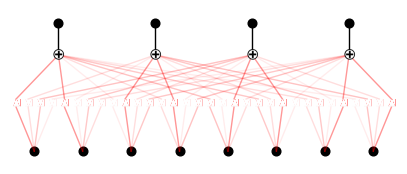

In [13]:
model.plot()

In [14]:
output = ex_round(model.symbolic_formula()[0][0], 4) # symbolic_formula()[0][0] gives [0] output [1] input parameters. [0][0] gives the first outputs symbolic equation.
print('After rounding, the formula 1 is:\n',output)
output2 = ex_round(model.symbolic_formula()[0][1], 4) # symbolic_formula()[0][0] gives [0] output [1] input parameters. [0][0] gives the first outputs symbolic equation.
print('After rounding, the formula 2 is:\n',output2)
output3 = ex_round(model.symbolic_formula()[0][2], 4) # symbolic_formula()[0][0] gives [0] output [1] input parameters. [0][0] gives the first outputs symbolic equation.
print('After rounding, the formula 3 is:\n',output3)
output4 = ex_round(model.symbolic_formula()[0][3], 4) # symbolic_formula()[0][0] gives [0] output [1] input parameters. [0][0] gives the first outputs symbolic equation.
print('After rounding, the formula 4 is:\n',output4)

After rounding, the formula 1 is:
 -0.0006*cos(6.7492*x_8 + 2.2247) + 0.2494 - 0.0013*exp(-12.96*(0.5389 - x_3)**2) - 0.0041*exp(-12.96*(0.5211 - x_5)**2) + 0.0073*exp(-13.4777*(0.5074 - x_2)**2) - 0.0023*exp(-13.0731*(0.5048 - x_7)**2) - 0.0037*exp(-13.8093*(0.4958 - x_6)**2) - 0.0023*exp(-12.287*(0.4898 - x_4)**2) + 0.0076*exp(-12.5826*(0.4691 - x_1)**2)
After rounding, the formula 2 is:
 -0.0006*cos(6.7492*x_5 + 2.2247) + 0.2494 - 0.0013*exp(-12.96*(0.5389 - x_2)**2) - 0.0041*exp(-12.96*(0.5211 - x_8)**2) + 0.0073*exp(-13.4777*(0.5074 - x_3)**2) - 0.0023*exp(-13.0731*(0.5048 - x_6)**2) - 0.0037*exp(-13.8093*(0.4958 - x_7)**2) - 0.0023*exp(-12.287*(0.4898 - x_1)**2) + 0.0076*exp(-12.5826*(0.4691 - x_4)**2)
After rounding, the formula 3 is:
 -0.0006*cos(6.749*x_4 - 8.9738) + 0.2494 + 0.0076*exp(-12.5826*(0.5309 - x_5)**2) - 0.0023*exp(-12.287*(0.5102 - x_8)**2) - 0.0037*exp(-13.8045*(0.5042 - x_2)**2) - 0.0023*exp(-13.072*(0.4952 - x_3)**2) + 0.0073*exp(-13.4801*(0.4926 - x_6)**2) - 0

In [15]:
# Assuming your symbolic expression (e.g., Y = x_1 + x_2 * x_3 + ...) 
# Replace this with your actual symbolic expression
x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8 = symbols('x_1 x_2 x_3 x_4 x_5 x_6 x_7 x_8') 
symbolic_expr = model.symbolic_formula()[0][0]

# Extract test data inputs and labels
X_test = dataset['test_input']  # Shape: (n_samples, 6)
Y_test = dataset['test_label']  # Shape: (n_samples,)

# List of symbols to map test_input to the symbolic expression
variables = [x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8]

In [16]:
# Evaluate symbolic expression for each row in X_test
Y_pred_sym = []
for row in X_test:
    # Create a dictionary to map symbolic variables to values
    inputs = {var: value for var, value in zip(variables, row)}
    # Evaluate the symbolic expression and use evalf() to get a float value
    Y_pred_sym.append(float(symbolic_expr.subs(inputs).evalf()))

In [17]:
# Compute R^2 score
y1test = ytest.iloc[:,0].values
sym_mae = mean_absolute_error(y1test, Y_pred_sym)
sym_mape = np.mean(np.abs((y1test - Y_pred_sym) / y1test)) * 100  # Mean Absolute Percentage Error
sym_mse = mean_squared_error(y1test, Y_pred_sym)
sym_rmspe = np.sqrt(np.mean(np.square((y1test - Y_pred_sym) / y1test))) * 100  # Root Mean Square Percentage Error
sym_rmse = np.sqrt(sym_mse)  # Root Mean Squared Error
sym_r2 = r2_score(y1test, Y_pred_sym)

# Printing the metrics
print(f"Symbolic Mean Absolute Error (MAE): {sym_mae:.4f}")
print(f"Symbolic Mean Absolute Percentage Error (MAPE): {sym_mape:.4f}%")
print(f"Symbolic Mean Squared Error (MSE): {sym_mse:.4f}")
print(f"Symbolic Root Mean Squared Error (RMSE): {sym_rmse:.4f}")
print(f"Symbolic Root Mean Square Percentage Error (RMSPE): {sym_rmspe:.4f}%")
print(f"Symbolic R-squared (R2): {sym_r2:.4f}")

Symbolic Mean Absolute Error (MAE): 0.0006
Symbolic Mean Absolute Percentage Error (MAPE): 0.2570%
Symbolic Mean Squared Error (MSE): 0.0000
Symbolic Root Mean Squared Error (RMSE): 0.0008
Symbolic Root Mean Square Percentage Error (RMSPE): 0.3244%
Symbolic R-squared (R2): 0.9643


In [18]:
X_test_np = xtest.to_numpy()
Y_test_np = ytest.to_numpy()
Y_test_pred_np = np.array(Y_pred_sym).reshape(-1,1)

# Combine X_test, Y_test, and Y_test_pred into a single DataFrame
data = np.hstack((X_test_np, Y_test_np, Y_test_pred_np))
columns = [f"x{i+1}" for i in range(X_test_np.shape[1])] + ["y1_test", "y2_test", "y3_test", "y4_test", "y_test_pred_KAN"]

# Create a DataFrame
df = pd.DataFrame(data, columns=columns)

# Export the DataFrame to a CSV file
output_file = "KAN_predictions.csv"
df.to_csv(output_file, index=False)

print(f"Predictions exported to {output_file}")

Predictions exported to KAN_predictions.csv
